In [32]:
# import modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dill
from scipy.stats import pearsonr
import math
from scipy.stats import chi2_contingency


from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
# functions
def V_cramer(tab, n):
    # Initiating objects
    nrow, ncol = tab.shape
    resultats_test = chi2_contingency(tab)
    statistique = resultats_test[0]
    # Computing objects
    r = ncol - (((ncol - 1) **  2) / (n - 1))
    k = nrow - (((nrow - 1) **  2) / (n - 1))
    phi_squared = max(0, ((statistique / n) - (((ncol - 1) * (nrow - 1)) / (n - 1))))
    V = math.sqrt((phi_squared / (min(k - 1, r - 1))))
    return V

In [3]:
##### Import of tables into dataframes
#dfLieux = pd.read_csv('20220906_table_lieux.csv', sep=',')
dfUsagers = pd.read_csv('20220906_table_usagers.csv', sep=',')
dfUsagers = dfUsagers.drop(["Unnamed: 0.1","Unnamed: 0"], axis = 1)
dfVehicules = pd.read_csv('20220906_table_vehicules.csv', sep=',')
dfVehicules = dfVehicules.drop(["Unnamed: 0.1","Unnamed: 0"], axis = 1)

dfCarac = pd.read_csv('20220906_table_caracteristiques.csv', sep=',')
dfCarac = dfCarac.drop(["Unnamed: 0.1","Unnamed: 0"], axis = 1)

dfPool = pd.read_csv('20221010_table_pool.csv')
dfPool = dfPool.drop(["Unnamed: 0"], axis = 1)


C:\Users\possa\AppData\Local\Temp\ipykernel_2848\2689996678.py:3: DtypeWarning: Columns (10,14) have mixed types. Specify dtype option on import or set low_memory=False.
  dfUsagers = pd.read_csv('20220906_table_usagers.csv', sep=',')
C:\Users\possa\AppData\Local\Temp\ipykernel_2848\2689996678.py:5: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  dfVehicules = pd.read_csv('20220906_table_vehicules.csv', sep=',')
C:\Users\possa\AppData\Local\Temp\ipykernel_2848\2689996678.py:8: DtypeWarning: Columns (6,12,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  dfCarac = pd.read_csv('20220906_table_caracteristiques.csv', sep=',')
C:\Users\possa\AppData\Local\Temp\ipykernel_2848\2689996678.py:11: DtypeWarning: Columns (19,20,31) have mixed types. Specify dtype option on import or set low_memory=False.
  dfPool = pd.read_csv('20221010_table_pool.csv')


In [4]:
#print('dfLieux dimensions:', dfLieux.shape)
print('dfUsagers dimensions:', dfUsagers.shape)
print('dfVehicules dimensions:', dfVehicules.shape)
print('dfCarac dimensions:', dfCarac.shape)
print('dfPool dimensions:', dfPool.shape)

dfUsagers dimensions: (2380467, 17)
dfVehicules dimensions: (1817587, 12)
dfCarac dimensions: (1065053, 17)
dfPool dimensions: (1065053, 61)


In [7]:
dfUsagers['place']=dfUsagers['place'].astype('Int32')
dfUsagers['secu'] =dfUsagers['secu'].astype('Int32')
dfUsagers['an_nais']=dfUsagers['an_nais'].astype('Int32')
dfUsagers['locp'] =dfUsagers['locp'].astype('Int32')
dfUsagers['etatp']=dfUsagers['etatp'].astype('Int32')
dfUsagers['secu1']=dfUsagers['secu1'].astype('Int32')
dfUsagers['secu2']=dfUsagers['secu2'].astype('Int32')
dfUsagers['secu3']=dfUsagers['secu3'].astype('Int32')

dfUsagers['actp']=dfUsagers['actp'].astype(str)
dfUsagers['actp']=dfUsagers['actp'].str.replace('.0','')

dfPool['an']=dfPool['an'].astype('Int32')

dfUsagers.info()
dfUsagers.head()

C:\Users\possa\AppData\Local\Temp\ipykernel_2848\1351039898.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  dfUsagers['actp']=dfUsagers['actp'].str.replace('.0','')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380467 entries, 0 to 2380466
Data columns (total 17 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Num_Acc      int64  
 1   place        Int32  
 2   catu         int64  
 3   grav         int64  
 4   sexe         int64  
 5   trajet       float64
 6   secu         Int32  
 7   locp         Int32  
 8   actp         object 
 9   etatp        Int32  
 10  an_nais      Int32  
 11  num_veh      object 
 12  id_vehicule  object 
 13  secu1        Int32  
 14  secu2        Int32  
 15  secu3        Int32  
 16  grav2        int64  
dtypes: Int32(8), float64(1), int64(5), object(3)
memory usage: 254.3+ MB


,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh,id_vehicule,secu1,secu2,secu3,grav2
0,201600000001,1,1,1,2,0.0,11,0,0,0,1983,B02,NaN,<NA>,<NA>,<NA>,1
1,201600000001,1,1,3,1,9.0,21,0,0,0,2001,A01,NaN,<NA>,<NA>,<NA>,3
2,201600000002,1,1,3,1,5.0,11,0,0,0,1960,A01,NaN,<NA>,<NA>,<NA>,3
3,201600000002,2,2,3,1,0.0,11,0,0,0,2000,A01,NaN,<NA>,<NA>,<NA>,3
4,201600000002,3,2,3,2,0.0,11,0,0,0,1962,A01,NaN,<NA>,<NA>,<NA>,3


In [9]:
##### Merging of tables into 1 pooled dataframe post-DataManagement (2 steps required)
dfPool= pd.merge(dfPool, dfUsagers, on="Num_Acc")

In [ ]:
dfPool.info()

In [ ]:
## A Faire
#Nettoyage des variables non significatives: 'locp', 'actp', 'etatp', 'an_nais', 'num_veh', 'id_vehicule', 'secu1', 'secu2', 'secu3'

In [24]:
#Calcul de l'age de l'usager au moment de l'accident:
dfPool['age']=dfPool['year']-dfPool['an_nais']
dfPool['age']=dfPool['age'].astype('Int32')

0          33
1          15
2          56
3          16
4          54
           ..
2380462     9
2380463    39
2380464    22
2380465    53
2380466    57
Name: age, Length: 2380467, dtype: Int32

C:\Users\possa\AppData\Local\Temp\ipykernel_2848\2467137177.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


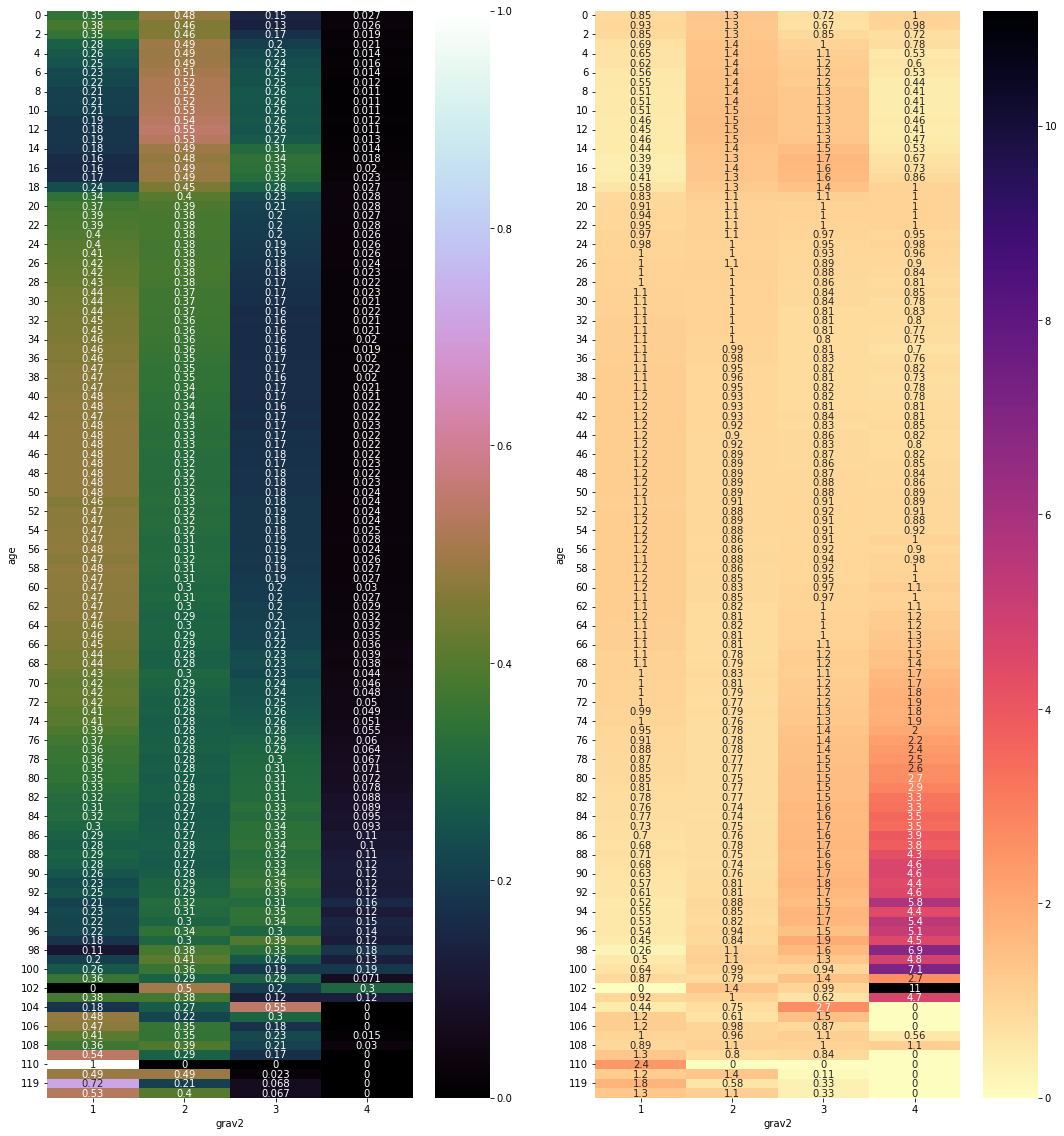

In [30]:
# Heatmap age au moment de l'accident / Grav2
dfAnNaisGrav=pd.crosstab(dfPool['age'], dfPool['grav2'])
dfAnNaisGrav=dfAnNaisGrav.apply(lambda x: x / x.sum(), axis=1)

fig, ax =plt.subplots(1, 2, figsize=(18,20))
sns.heatmap(dfAnNaisGrav, annot=True, cmap='cubehelix', ax=ax[0])
sns.heatmap(dfAnNaisGrav.apply(lambda x: x/dfPool['grav2'].value_counts(normalize=True), axis=1), annot=True, cmap='magma_r', ax=ax[1])

fig.show();

In [31]:
dfPool.shape  #(1065053, 61)


(2380467, 78)

In [33]:
# Suppression des instances contenant au moins une valeur nulle.
dfPool.dropna()

,Num_Acc,catr,circ,nbv,vosp,prof,plan,lartpc,larrout,surf,...,actp,etatp,an_nais,num_veh,id_vehicule,secu1,secu2,secu3,grav2,age


In [50]:
#
dfClass_age = pd.cut(x = dfPool['age'],
                  bins = [0, 20, 65, 120],
                  labels = ['enfant', 'adulte', 'senior'])

pd.crosstab(dfPool['grav2'],dfClass_age, normalize='columns')

age,enfant,adulte,senior
grav2,,,
1,0.255621,0.448874,0.379631
2,0.458351,0.347862,0.282361
3,0.264077,0.179559,0.275333
4,0.021950,0.023705,0.062676


In [ ]:
# Heatmap Années naissance / Grav2
dfAnNaisGrav=pd.crosstab(dfPool['age'], dfPool['grav2'])
dfAnNaisGrav=dfAnNaisGrav.apply(lambda x: x / x.sum(), axis=1)

fig, ax =plt.subplots(1, 2, figsize=(18,20))
sns.heatmap(dfAnNaisGrav, annot=True, cmap='cubehelix', ax=ax[0])
sns.heatmap(dfAnNaisGrav.apply(lambda x: x/dfPool['grav2'].value_counts(normalize=True), axis=1), annot=True, cmap='magma_r', ax=ax[1])

fig.show();

In [60]:
dfPool=dfPool.join(pd.get_dummies(dfClass_age))

In [75]:
# Séparation des données et des cibles
# Nous faisons le choix d'entrainer les features dichotomisées 
# celles qui correspondent à la classe d'age

target = dfPool['grav2']
data = dfPool[['enfant','adulte','senior']]

#data.columns


Index(['enfant', 'adulte', 'senior'], dtype='object')

In [76]:
# Décomposition des données en deux ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=1)

In [77]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1904373 entries, 1426346 to 128037
Data columns (total 3 columns):
 #   Column  Dtype
---  ------  -----
 0   enfant  uint8
 1   adulte  uint8
 2   senior  uint8
dtypes: uint8(3)
memory usage: 20.0 MB


In [78]:
# Création du classifieur et construction du modèle sur les données d'entraînement
clf=linear_model.LogisticRegression(C=1.0)
clf.fit(X_train, y_train)

LogisticRegression()

In [86]:
y_pred = clf.predict(X_test)

# Calcul de la matrice de confusion 
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred)
print(cm)



[[173066  21497      0      0]
 [134278  38107      0      0]
 [ 74433  22121      0      0]
 [ 10839   1753      0      0]]


In [87]:
cm = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
cm

Classe prédite,1,2
Classe réelle,,
1,173066,21497
2,134278,38107
3,74433,22121
4,10839,1753


In [80]:
# Calcul du score
clf.score(X_test, y_test)

0.44355316387100024

In [88]:
#rapport de classification des prédictions
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


C:\Users\possa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.44      0.89      0.59    194563
           2       0.46      0.22      0.30    172385
           3       0.00      0.00      0.00     96554
           4       0.00      0.00      0.00     12592

    accuracy                           0.44    476094
   macro avg       0.22      0.28      0.22    476094
weighted avg       0.35      0.44      0.35    476094



C:\Users\possa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\possa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [89]:
probs = clf.predict_proba(X_test)

y_preds = np.where(probs[:,1]>0.4,1,0)

cm = pd.crosstab(y_test, y_preds, rownames=['Classe réelle'], colnames=['Classe prédite'])
cm

Classe prédite,0,1
Classe réelle,,
1,173488,21075
2,134708,37677
3,74688,21866
4,10882,1710


In [90]:
#courbe ROC pour evaluer la performance du modèle
from sklearn.metrics import roc_curve, auc

fpr, tpr, seuils = roc_curve(y_test, probs[:,1], pos_label=1)
roc_auc = auc(fpr, tpr)

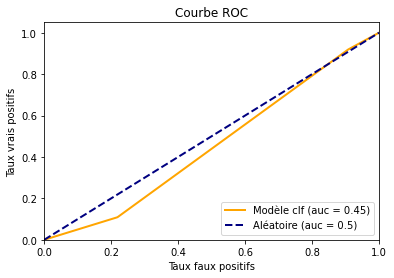

In [91]:
plt.plot(fpr, tpr, color='orange', lw=2, label='Modèle clf (auc = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aléatoire (auc = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux faux positifs')
plt.ylabel('Taux vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show();